In [ ]:
'''Predicting Pulsar Stars'''
#binary classification algorithm

#Load Models
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

#shows visualization in line -> replaces plt.show
%matplotlib inline

In [ ]:
#IMPORTING DATA
data_train = pd.read_csv('Datasets/pulsar_star_dataset/pulsar_data_train.csv')
data_test = pd.read_csv('Datasets/pulsar_star_dataset/pulsar_data_test.csv')



In [ ]:
#TRAINING SET DATA TREATMENT
#demonstrates the data shape: number fo entries(rows) and columns
print("---------------------------------------------------")
print("Dataset's Shape: ", data_train.shape)
print("--------------------------------------------------- \n")

print(data_train.info())

In [ ]:
#As all columns are relevant datapoints, none are droped 
data_train.head()

In [ ]:
#Checks if variables have any null values
print("---------------------------------------------------")
print("Null Values:\n")
print(data_train.isna().sum())
print("--------------------------------------------------- \n")

#demonstrates Nan values within the dataset
#white strips represents Nan values in a column
msno.matrix(data_train)

In [ ]:
#drops rows with Nan values
data_train.dropna(inplace=True)

#demonstrates the data shape to confirm the treated data has at least 1000 entries
print("---------------------------------------------------")
print("Dataset's Shape: ", data_train.shape)
print("--------------------------------------------------- \n")

data_train.head()

In [ ]:
#Checks if variables have any null values
print("---------------------------------------------------")
print("Null Values:\n")
print(data_train.isna().sum())
print("--------------------------------------------------- \n")

#demonstrates Nan values within the dataset
#lack of white strips represents the lack of Nan values
msno.matrix(data_train)

In [48]:
#TESTING SET DATA TREATMENT
#demonstrates the data shape: number fo entries(rows) and columns
print("---------------------------------------------------")
print("Dataset's Shape: ", data_test.shape)
print("--------------------------------------------------- \n")

print(data_test.info())

---------------------------------------------------
Dataset's Shape:  (5370, 9)
--------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64


In [49]:
#As all columns are relevant datapoints, none are droped 
data_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


---------------------------------------------------
Null Values:

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64
--------------------------------------------------- 



<AxesSubplot:>

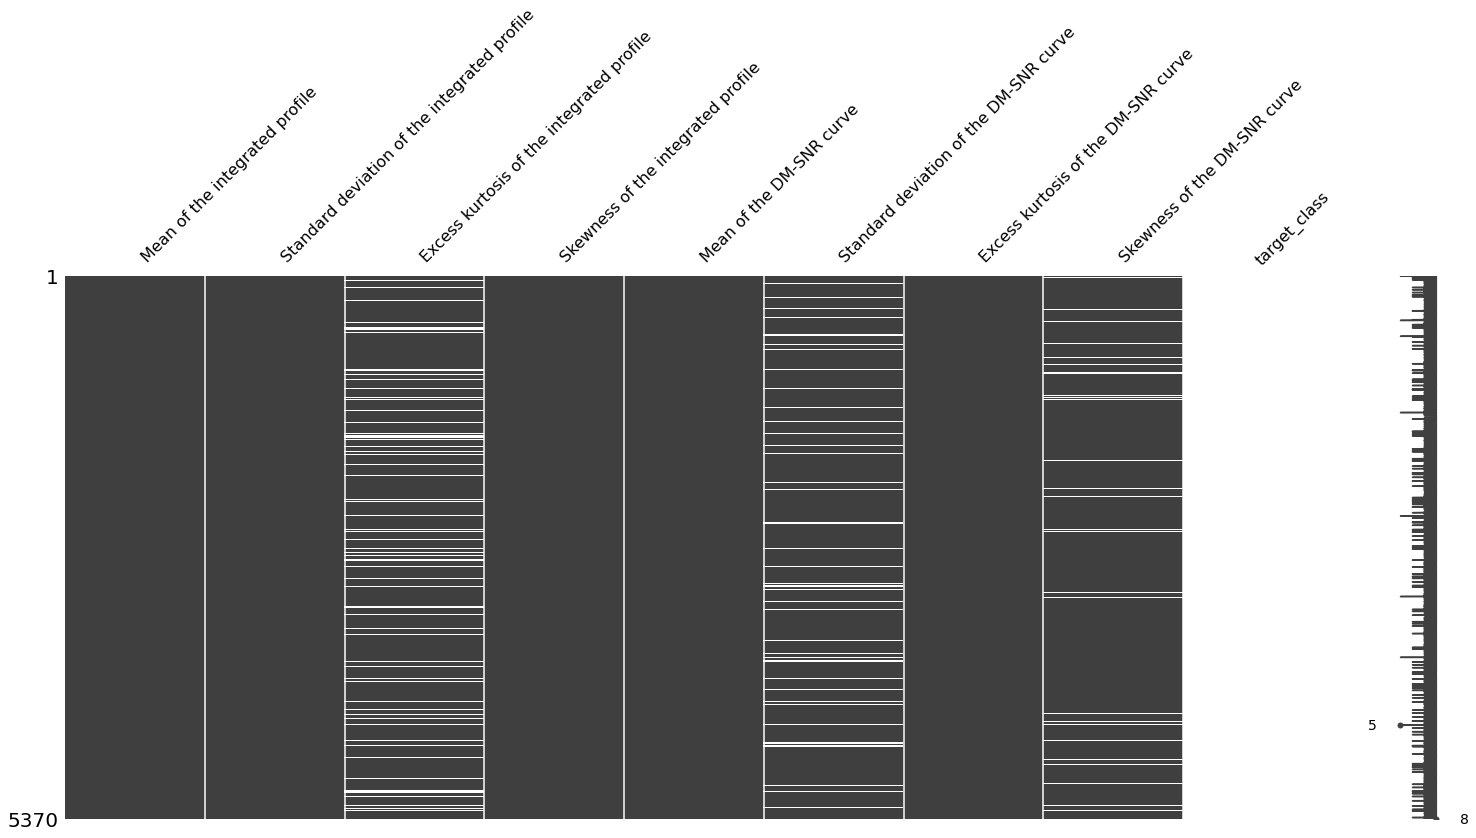

In [50]:
#Checks if variables have any null values
print("---------------------------------------------------")
print("Null Values:\n")
print(data_test.isna().sum())
print("--------------------------------------------------- \n")

#demonstrates Nan values within the dataset
#white strips represents Nan values in a column
msno.matrix(data_test)